In [24]:
import numpy as np
import matplotlib.pyplot as plt
import glob
plt.rcParams['animation.ffmpeg_path'] = '/opt/homebrew/bin/ffmpeg'
from astropy.constants import G, M_sun, au 

def cart_2_kep(x, y, z, vx, vy, vz):
    """
    Converts cartesian coordinates to Keplerian coordinates

    Parameters
    ----------
    x : float
        position (x-axis)
    y : float
        position (y-axis)
    z : float
        position (z-axis)
    vx : float
        velocity (x-axis) in AU/day' (must be multiplied by 0.01720209895 to be converted in AU/day)
    vy : float
        velocity (y-axis) in AU/day' (must be multiplied by 0.01720209895 to be converted in AU/day)
    vz : float
        velocity (z-axis) in AU/day' (must be multiplied by 0.01720209895 to be converted in AU/day)

    Returns
    -------
    a, e: float
        Keplerian coordinates of the protoplanets / planetesimals 

    """
    # Convert the units of the velocity from AU/day' to AU/day
    vx = vx * 0.01720209895
    vy = vy * 0.01720209895
    vz = vz * 0.01720209895
    
    # Compute the radius, r, and velocity v
    r = np.sqrt(x**2 + y**2 + z**2)
    v = np.sqrt(vx**2 + vy**2 + vz**2)
    
    # Compute vector r and vector v
    r_vector = np.array([x, y, z])
    v_vector = np.array([vx, vy, vz])
    
    # Compute the specific angular momentum
    h_vector = np.cross(r_vector, v_vector)
    h = np.sqrt(h_vector[0]**2 + h_vector[1]**2 + h_vector[2]**2)
    
    # Compute the Standard gravitational parameter in AU/day
    mu_ms = G.value * M_sun.value # Standard gravitational parameter = GM of the central body
                                  # with G the Newtonian constant of gravitation (in m^3s^-2) 
    mu = mu_ms * (86400**2) / ((au.value)**3)    # There are 86400 s in a Julian day 
    
    # Compute the specific energy E
    E = ((v**2) / 2) - (mu / r)
    
    # Compute semi-major axis a
    a = - mu / (2 * E)
    
    # Compute eccentricity e
    e = np.sqrt(1 - (h**2 / (a * mu)))
    
    return a, e

In [4]:
# Create the figure
fig, ax = plt.subplots(figsize=(10,7))
for filename in sorted(glob.glob('/Users/sarahjoiret/Desktop/sims/genga/case2_output/big/nesvorny/10000comets/1_86Myr/giants/Outnesvorny_p000*.dat', recursive=True)):
    print(filename)
    
    # Colours
    c = ['m', 'C1', 'g', 'C7', 'b']
    
    # Labels
    l = ['Jupiter', 'Saturn', 'Uranus','Ice1', 'Neptune']
    
    data = np.loadtxt(filename)
    if data.shape == (21,):
        time = np.asarray([data[0]])
        mass = np.asarray([data[2]])
        x = np.asarray([data[4]])
        y = np.asarray([data[5]])
        z = np.asarray([data[6]])
        vx = np.asarray([data[7]])
        vy = np.asarray([data[8]])
        vz = np.asarray([data[9]])
        n = int(np.asarray([data[1]])) # Index of the particle
        
    else:
        time = data[:,0]
        mass = data[:,2]
        x = data[:,4]
        y = data[:,5]
        z = data[:,6]
        vx = data[:,7]
        vy = data[:,8]
        vz = data[:,9]
        n = int(data[0,1]) # Index of the particle
    print(n)
        
    len_time = len(time)
    a = np.array([])
    e = np.array([])
    
    for i in range(len_time):
        aa = cart_2_kep(x[i], y[i], z[i], vx[i], vy[i], vz[i])[0]
        ee = cart_2_kep(x[i], y[i], z[i], vx[i], vy[i], vz[i])[1]
        a = np.append(a, aa)
        e = np.append(e, ee)

    ax.plot(time/1e6, a*(1-e), color = c[n], linewidth=0.5)
    ax.plot(time/1e6, a*(1+e), color = c[n], linewidth=0.5)
    ax.plot(time/1e6, a, color = c[n], linewidth=3, label = l[n])

    ax.set_xlabel('Time [Myr]', fontsize=12)
    ax.set_ylabel('Semi-major axis [AU]', fontsize=12)
    ax.vlines(x=6.0, ymin=-0.1, ymax=40, color='black')
    ax.set_ylim(0, 40)
    ax.set_xlim(0, 12)
    
ax.legend()    
#plt.savefig('/Users/sarahjoiret/Desktop/sims/genga/case2_output/big/nesvorny/10000comets/1/instability_nesvorny_12Myr.pdf', dpi=200)

/Users/sarahjoiret/Desktop/sims/genga/case2_output/big/nesvorny/10000comets/1_86Myr/giants/Outnesvorny_p000000.dat
0
/Users/sarahjoiret/Desktop/sims/genga/case2_output/big/nesvorny/10000comets/1_86Myr/giants/Outnesvorny_p000001.dat
1
/Users/sarahjoiret/Desktop/sims/genga/case2_output/big/nesvorny/10000comets/1_86Myr/giants/Outnesvorny_p000002.dat
2
/Users/sarahjoiret/Desktop/sims/genga/case2_output/big/nesvorny/10000comets/1_86Myr/giants/Outnesvorny_p000003.dat
3
/Users/sarahjoiret/Desktop/sims/genga/case2_output/big/nesvorny/10000comets/1_86Myr/giants/Outnesvorny_p000004.dat
4


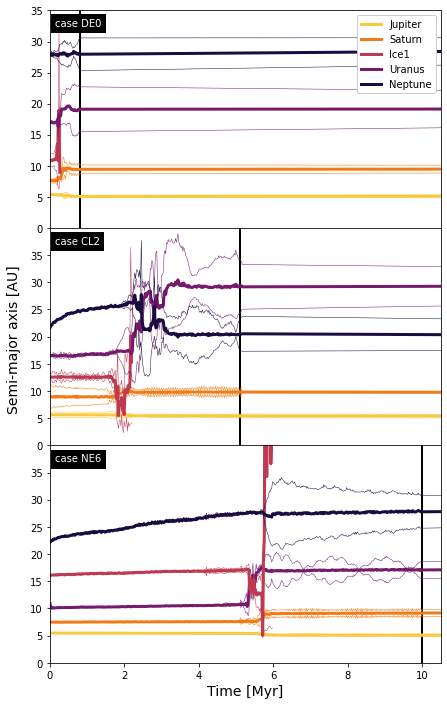

In [36]:
# Create the figure
fig, axs = plt.subplots(3, 1, sharex=True, sharey=False, figsize=(7,12))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)
plt.xlabel('Time [Myr]', fontsize=14)
fig.supylabel('Semi-major axis [AU]', x=0.04, y=0.5, fontsize=14)
#plt.ylabel('Semi-major axis [AU]', fontsize=12)
plt.xlim(0, 10.5)
#plt.ylim(0, 32)
pathfile = np.empty(3, dtype=object)
pathfile[0] = '/Users/sarahjoiret/Desktop/sims/genga/case2_output/big/deienno/10000comets/1/giants/Outdeienno_p000*.dat'
pathfile[1] = '/Users/sarahjoiret/Desktop/sims/genga/case2_output/big/clement/10000comets/1/giants/Outclement_p000*.dat'
pathfile[2] = '/Users/sarahjoiret/Desktop/sims/genga/case2_output/big/nesvorny/10000comets/1_86Myr/giants/Outnesvorny_p000*.dat'

for j in np.arange(3):
    for filename in sorted(glob.glob(pathfile[j], recursive=True)):
        if j == 2:
            # Colours
            #c = ['m', 'C1', 'g', 'C7', 'b']
            c = ["#F9C93F","#F47A15","#751A6D", "#BE3952","#1A0B41"] # inferno
            #c = ['#95D840FF', '#1F968BFF','#39568CFF', 'C7','#440154FF'] #viridis
            #c = ['#f9b641ff','#de7065ff','#7e4e90ff','C7','#13306dff'] # plasma
    
            # Labels
            l = ['Jupiter', 'Saturn', 'Uranus','Ice1', 'Neptune']
        else:
            # Colours
            #c = ['m', 'C1', 'C7', 'g', 'b']
            c = ["#F9C93F","#F47A15","#BE3952","#751A6D","#1A0B41"] # inferno
            #c = ['#95D840FF', '#1F968BFF','C7','#39568CFF','#440154FF'] #viridis
            #c = ['#f9b641ff','#de7065ff','C7','#7e4e90ff','#13306dff'] # plasma
    
            # Labels
            l = ['Jupiter', 'Saturn', 'Ice1', 'Uranus', 'Neptune']
    
        data = np.loadtxt(filename)
        if data.shape == (21,):
            time = np.asarray([data[0]])
            mass = np.asarray([data[2]])
            x = np.asarray([data[4]])
            y = np.asarray([data[5]])
            z = np.asarray([data[6]])
            vx = np.asarray([data[7]])
            vy = np.asarray([data[8]])
            vz = np.asarray([data[9]])
            n = int(np.asarray([data[1]])) # Index of the particle
        
        else:
            time = data[:,0]
            mass = data[:,2]
            x = data[:,4]
            y = data[:,5]
            z = data[:,6]
            vx = data[:,7]
            vy = data[:,8]
            vz = data[:,9]
            n = int(data[0,1]) # Index of the particle

        
        len_time = len(time)
        a = np.array([])
        e = np.array([])
    
        for i in range(len_time):
            aa = cart_2_kep(x[i], y[i], z[i], vx[i], vy[i], vz[i])[0]
            ee = cart_2_kep(x[i], y[i], z[i], vx[i], vy[i], vz[i])[1]
            a = np.append(a, aa)
            e = np.append(e, ee)

        axs[j].plot(time/1e6, a*(1-e), color = c[n], linewidth=0.5)
        axs[j].plot(time/1e6, a*(1+e), color = c[n], linewidth=0.5)
        axs[j].plot(time/1e6, a, color = c[n], linewidth=3, label = l[n])
        if j == 0:
            axs[0].legend(loc = 'upper right', framealpha=1.0) 
            axs[0].vlines(x=0.8, ymin=-0.1, ymax=40, color='black')
            axs[0].set_ylim(0, 35)
            axs[0].text(0.12, 32.5, 'case DE0', backgroundcolor = 'black', color='white')
        if j == 1:
            axs[1].vlines(x=5.1, ymin=-0.1, ymax=40, color='black')
            axs[1].set_ylim(0, 40)
            axs[1].text(0.12, 37.0, 'case CL2', backgroundcolor = 'black', color='white')
            axs[1].set_yticks([0,5,10,15,20,25,30,35])
        if j == 2:
            axs[2].vlines(x=10.0, ymin=-0.1, ymax=40, color='black')
            axs[2].set_ylim(0, 40)
            axs[2].text(0.12, 37.0, 'case NE6', backgroundcolor = 'black', color='white')
            axs[2].set_yticks([0,5,10,15,20,25,30,35])

plt.savefig('/Users/sarahjoiret/Desktop/sims/genga/case2_output/instability_10Myr_inferno.pdf', dpi=200, bbox_inches='tight')